# Data Collection and Preperation

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle

 ## Bikesharing Rentals Data

The dataset contains data by Bikeshare Metro in Los Angeles of the year 2018. It contains the following variables: <br>
<br>
**start_time**: Day and time trip started [datetime]<br>
**end_time**: Day and time trip ended [datetime]<br>
**start_station_id**: Unique ID of station where trip originated [int]<br>
**end_station_id**: Unique ID of station where trip terminated [int]<br>
**bike_id**: Unique ID attached to each bike [int]<br>
**user_type**: User membership type [str]<br>
**start_station_name**: Name of station where trip originated [str]<br>
**end_station_name**: Name of station where trip terminated [str]<br>

### Import & Inspection before further Processing

In [39]:
df_LA = pd.read_csv('../data/LosAngeles/la_2018.csv') 

df_LA

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station
...,...,...,...,...,...,...,...,...
311889,2018-12-31 23:46:00,2018-12-31 23:55:00,3069,3069,6222,Walk-up,Broadway & 3rd,Broadway & 3rd
311890,2018-12-31 23:47:00,2018-12-31 23:54:00,3069,3069,5730,Walk-up,Broadway & 3rd,Broadway & 3rd
311891,2018-12-31 23:51:00,2019-01-01 01:28:00,4211,4210,12347,Walk-up,Pacific & North Venice,Ocean Front Walk & North Venice
311892,2018-12-31 23:54:00,2019-01-01 00:22:00,3005,3082,12128,Walk-up,7th & Flower,Traction & Rose


In [40]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311894 entries, 0 to 311893
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          311894 non-null  object
 1   end_time            311894 non-null  object
 2   start_station_id    311894 non-null  int64 
 3   end_station_id      311894 non-null  int64 
 4   bike_id             311894 non-null  int64 
 5   user_type           311894 non-null  object
 6   start_station_name  311894 non-null  object
 7   end_station_name    311894 non-null  object
dtypes: int64(3), object(5)
memory usage: 19.0+ MB


## Preperation

### Duplicates

In [41]:
df_LA[df_LA.duplicated(keep=False)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
12598,2018-01-19 13:48:00,2018-01-19 13:56:00,4213,4207,11972,Walk-up,7th & Westminster,Rose & 7th
12599,2018-01-19 13:48:00,2018-01-19 13:56:00,4213,4207,11972,Walk-up,7th & Westminster,Rose & 7th
12969,2018-01-20 00:11:00,2018-01-20 00:35:00,4213,4214,12048,Monthly Pass,7th & Westminster,Ocean Front Walk & Navy
12971,2018-01-20 00:11:00,2018-01-20 00:35:00,4213,4214,12048,Monthly Pass,7th & Westminster,Ocean Front Walk & Navy
12973,2018-01-20 00:18:00,2018-01-20 00:35:00,4213,4214,6589,Monthly Pass,7th & Westminster,Ocean Front Walk & Navy
...,...,...,...,...,...,...,...,...
194343,2018-08-20 05:23:00,2018-08-20 05:43:00,3014,3014,6312,Monthly Pass,Union Station West Portal,Union Station West Portal
198264,2018-08-23 23:36:00,2018-08-23 23:56:00,3038,3038,11980,Monthly Pass,Main & 5th,Main & 5th
198265,2018-08-23 23:36:00,2018-08-23 23:56:00,3038,3038,11980,Monthly Pass,Main & 5th,Main & 5th
242951,2018-10-05 16:23:00,2018-10-06 16:42:00,3038,3000,12370,Monthly Pass,Main & 5th,Virtual Station


First we delete all the duplicates by only keeping the last entry.

In [42]:
#drop duplicates and keep the last
df_LA = df_LA.drop_duplicates(keep='last')

We now have 311852 entries after removing 42 entries.

In [43]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311852 entries, 0 to 311893
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          311852 non-null  object
 1   end_time            311852 non-null  object
 2   start_station_id    311852 non-null  int64 
 3   end_station_id      311852 non-null  int64 
 4   bike_id             311852 non-null  int64 
 5   user_type           311852 non-null  object
 6   start_station_name  311852 non-null  object
 7   end_station_name    311852 non-null  object
dtypes: int64(3), object(5)
memory usage: 21.4+ MB


#### Only one Station ID for every Station Name

We want to ensure that every station_name is reffered to only one station_id and vice versa.

In [44]:
df_id = df_LA.sort_values(by=['bike_id','start_time'], ascending=True)

df_unique_id = df_id.groupby('start_station_id')['start_station_name'].nunique().reset_index()
df_unique_name = df_id.groupby('start_station_name')['start_station_id'].nunique().reset_index()

print(df_unique_id)
print(df_unique_name)

     start_station_id  start_station_name
0                3000                   1
1                3005                   1
2                3006                   1
3                3007                   1
4                3008                   1
..                ...                 ...
127              4266                   1
128              4267                   1
129              4273                   1
130              4275                   1
131              4276                   1

[132 rows x 2 columns]
               start_station_name  start_station_id
0                    11th & Maple                 1
1                     12th & Hill                 1
2    17th St / SMC E Line Station                 1
3                 18th & Figueroa                 1
4                18th & San Pedro                 1
..                            ...               ...
127        Waterfront Park (East)                 1
128        Waterfront Park (West)                 1
129 

In [69]:
print("hier text einfügen", str(df_unique_id.start_station_name.max()))
print("hier text einfügen", str(df_unique_name.start_station_id.max()))

hier text einfügen 1
hier text einfügen 1


We see that both printed values are "1". This implies, that there is only one station_id for every station_name and vice versa.

### Start Time, End Time and Trip Duration

Transforming the datetime into the right format.

In [71]:
#transform columns start_time and end_time into datetime
df_LA['start_time'] = pd.to_datetime(df_LA['start_time'])
df_LA['end_time'] = pd.to_datetime(df_LA['end_time'])

Adding a new column "trip_duration" by subtracting the "end_time" from the "start_time" for later analysis.

In [47]:
# calculate the total trip duration in hours
#df_LA['trip_duration'] = df_LA['end_time'] - df_LA['start_time']

# calculate the total trip duration in hours
df_LA['trip_duration'] = df_LA.apply(lambda x: x['end_time'] - x['start_time'], axis=1) / pd.Timedelta(hours=1)
#df['trip_duration'] = df['end_time'] - df['start_time']


<ipython-input-47-8c4d486ab0e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['trip_duration'] = df_LA.apply(lambda x: x['end_time'] - x['start_time'], axis=1) / pd.Timedelta(hours=1)


The new column "trip_duration" is now visible an contains the trip duration calculated from start_time and end_time.

In [48]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311852 entries, 0 to 311893
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          311852 non-null  datetime64[ns]
 1   end_time            311852 non-null  datetime64[ns]
 2   start_station_id    311852 non-null  int64         
 3   end_station_id      311852 non-null  int64         
 4   bike_id             311852 non-null  int64         
 5   user_type           311852 non-null  object        
 6   start_station_name  311852 non-null  object        
 7   end_station_name    311852 non-null  object        
 8   trip_duration       311852 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 23.8+ MB


In [49]:
df_LA.head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0.350000
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0.333333
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0.316667
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0.366667
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0.750000


#### Trip Duration Outliers

In order to sort out possible incorrect trip data or trips where the user has forgotten to return the bike, for example, we take a closer look at the trip lengths.

In [57]:
df_LA.sort_values(by=["trip_duration"], ascending=False).head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration
306166,2018-12-22 14:20:00,2018-12-28 17:49:00,3033,3000,6134,Walk-up,Main & 9th,Virtual Station,147.483333
129398,2018-06-15 14:17:00,2018-06-21 14:55:00,3068,3048,12452,Walk-up,Grand & 3rd,5th & Hewitt,144.633333
61758,2018-03-27 18:12:00,2018-04-02 15:59:00,4162,3000,6248,Monthly Pass,Memorial Park Station,Virtual Station,141.783333
244953,2018-10-07 16:14:00,2018-10-13 10:13:00,4210,3000,6265,Walk-up,Ocean Front Walk & North Venice,Virtual Station,137.983333
306480,2018-12-23 02:51:00,2018-12-28 17:41:00,4204,3000,5917,Walk-up,Washington & Abbot Kinney,Virtual Station,134.833333


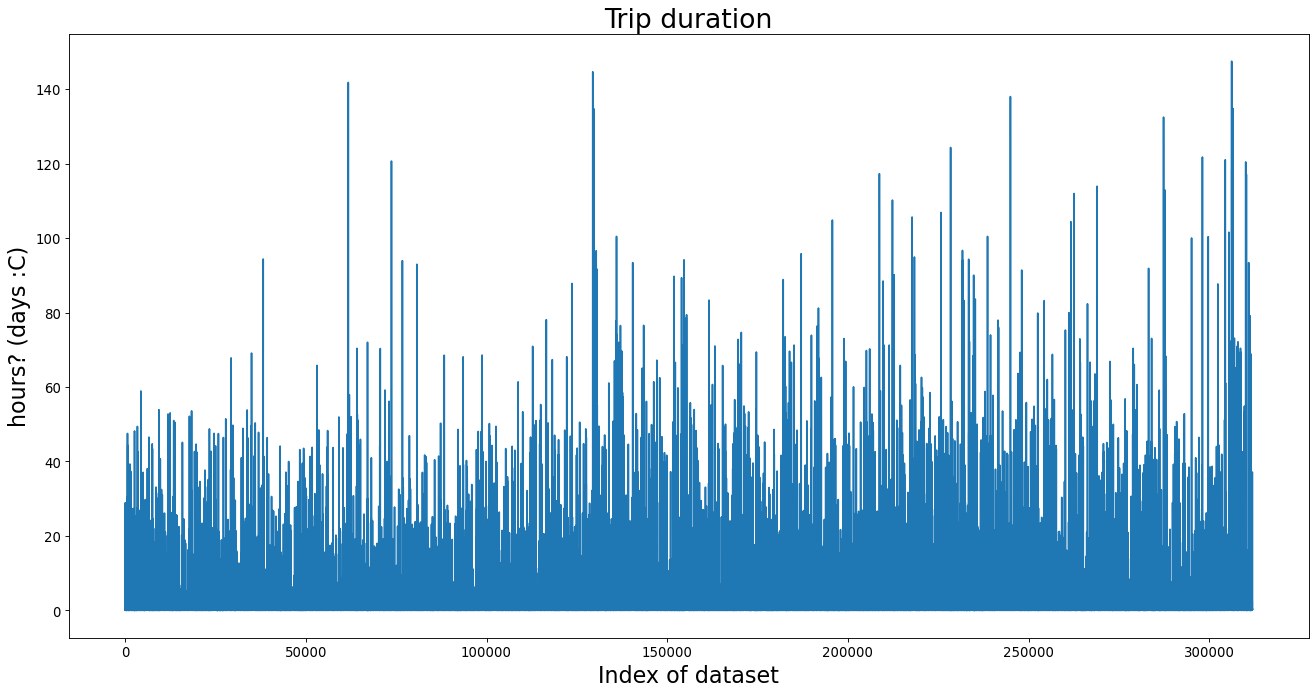

In [50]:
#plot trip duration
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}

ax.plot(df_LA['trip_duration'], color = 'tab:blue')
ax.set_title("Trip duration", dic)
ax.set_ylabel('hours? (days :C)',**axis_font)
ax.set_xlabel('Index of dataset',**axis_font)
ax.tick_params(axis='both', **label_font)
plt.show()

However, we see that the maximum travel time is just over 5 hours, which we consider to be a realistic travel length.

In [51]:
df_LA['trip_duration'].describe()

count    311852.000000
mean          0.768596
std           3.439203
min           0.016667
25%           0.116667
50%           0.216667
75%           0.483333
max         147.483333
Name: trip_duration, dtype: float64

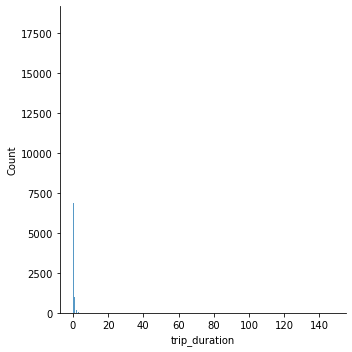

In [52]:
sns.displot(df_LA["trip_duration"])

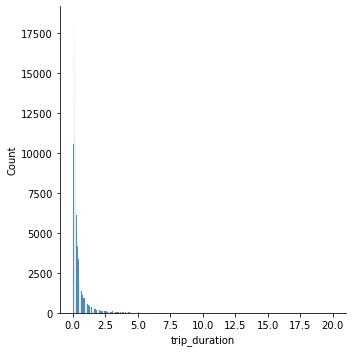

In [53]:
duration_temp = df_LA[df_LA["trip_duration"] < 20]
sns.displot(duration_temp["trip_duration"])

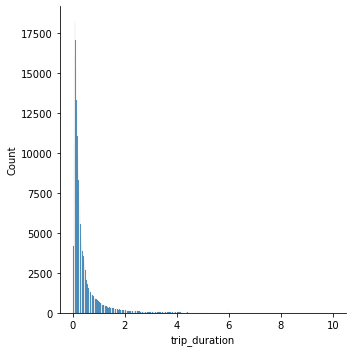

In [54]:
duration_temp = df_LA[df_LA["trip_duration"] < 10]
sns.displot(duration_temp["trip_duration"])

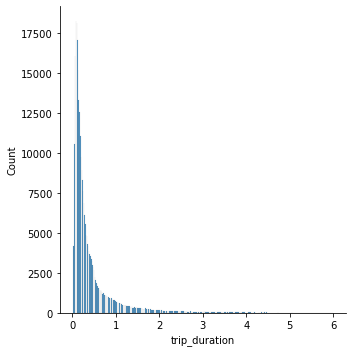

In [55]:
duration_temp = df_LA[df_LA["trip_duration"] < 6]
sns.displot(duration_temp["trip_duration"])

blabalbla hier wir nehmen kleiner 6 (1/4 des tages)

In [56]:
duration_temp = df_LA[df_LA["trip_duration"] <= 6]
x = duration_temp.count() / df_LA.count()


In [72]:
df_LA = duration_temp
df_LA.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0.350000
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0.333333
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0.316667
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0.366667
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0.750000


### Only one trip at the same time

In [58]:
df_id = df_LA.sort_values(by=['bike_id','start_time'], ascending=True)
temp = df_id[['start_time','end_time', 'bike_id']]

#add columns next_ride_start and next_bike_id which contain the shifted columns
temp = temp.assign(next_ride_start=0)
temp['next_ride_start']= temp['start_time'].shift(periods=-1)
temp = temp.assign(next_bike_id=0)
temp['next_bike_id']= temp['bike_id'].shift(periods=-1)

#compare the id (id_compare) to ensure, the next trip is with the same bike
#compare the start time of the next trip to the end time of the previos trip
temp['id_compare'] = temp.apply(lambda x: True if ((x['bike_id'] == x['next_bike_id'])) else False, axis=1)
temp = temp.dropna() #drop last row because of nan
temp['check'] = temp.apply(lambda x: True if ((x['next_ride_start'] >= x['end_time'])) else False, axis=1)

#Find wrong entrys in dataset
df_trips_same_time = temp[(temp['check']==False)&(temp['id_compare']==True)]
print('Wrong entrys: '+str(len(df_trips_same_time)))

Wrong entrys: 237


**Exapmle of wrong entrys:** 193634, 193636, 194167 <br> In the original dataframe (below) you can see, that the trips 193634, 193636 and 194167 are unrealistic.

In [59]:
#df_trips_same_time dataframe
df_trips_same_time[(df_trips_same_time['bike_id']==5006)&(df_trips_same_time['start_time']>='2018-08-19 14:32:00')].head(5)

,start_time,end_time,bike_id,next_ride_start,next_bike_id,id_compare,check
193634,2018-08-19 14:32:00,2018-08-19 20:32:00,5006,2018-08-19 14:32:00,5006.0,True,False
193636,2018-08-19 14:32:00,2018-08-19 14:52:00,5006,2018-08-19 14:32:00,5006.0,True,False
194167,2018-08-19 20:32:00,2018-08-20 02:32:00,5006,2018-08-19 20:32:00,5006.0,True,False


In [60]:
#original dataframe
df_id[(df_id['bike_id']==5006)&(df_id['start_time']>='2018-08-19 14:32:00')].head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration
193634,2018-08-19 14:32:00,2018-08-19 20:32:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,6.000000
193636,2018-08-19 14:32:00,2018-08-19 14:52:00,4126,4131,5006,Monthly Pass,Cabrillo Beach,Downtown Harbor,0.333333
193637,2018-08-19 14:32:00,2018-08-19 14:52:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,0.333333
194167,2018-08-19 20:32:00,2018-08-20 02:32:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,6.000000
194168,2018-08-19 20:32:00,2018-08-19 20:52:00,4126,4131,5006,Monthly Pass,Cabrillo Beach,Downtown Harbor,0.333333


In [61]:
#drop the found data from the df_LA
print('Entrys before drop: ' + str(len(df_LA)))
droplist = list(df_trips_same_time.index)
droplist
df_LA = df_LA.drop(droplist)
print('Entrys after drop: ' + str(len(df_LA)))

Entrys before drop: 311852
Entrys after drop: 311615


### Export

In [62]:
df_LA.to_csv(r'../data/LA.csv', index = False)
df_LA

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0.350000
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0.333333
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0.316667
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0.366667
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0.750000
...,...,...,...,...,...,...,...,...,...
311889,2018-12-31 23:46:00,2018-12-31 23:55:00,3069,3069,6222,Walk-up,Broadway & 3rd,Broadway & 3rd,0.150000
311890,2018-12-31 23:47:00,2018-12-31 23:54:00,3069,3069,5730,Walk-up,Broadway & 3rd,Broadway & 3rd,0.116667
311891,2018-12-31 23:51:00,2019-01-01 01:28:00,4211,4210,12347,Walk-up,Pacific & North Venice,Ocean Front Walk & North Venice,1.616667
311892,2018-12-31 23:54:00,2019-01-01 00:22:00,3005,3082,12128,Walk-up,7th & Flower,Traction & Rose,0.466667


The prepared dataframe is exportet to the designated folder.

## Kram den ich nach Hinten verschoben habe (bleibt der hier drin?)

In [63]:
############################necessary??? All results are 'keep'#####################################

#define conditions
##conditions = [df_LA['end_time'] < df_LA['start_time'],
##              df_LA['start_time'] < df_LA['end_time'],
##              df_LA['start_time'] == df_LA['end_time']]

#define choices
##choices=["Delete","Keep", "Delete"]

#create new column in DataFrame that displays results of comparisons
##df_LA['result'] = np.select(conditions, choices, default='Tie')

#view result
##df_LA.head()
#distinctfct 

In [64]:
df_2018_q1 = pd.read_csv('../data/metro-bike-share-trips-2018-q1.csv')
df_2018_q2 = pd.read_csv('../data/metro-bike-share-trips-2018-q2.csv')
df_2018_q3 = pd.read_csv('../data/metro-bike-share-trips-2018-q3.csv')
df_2018_q4 = pd.read_csv('../data/metro-bike-share-trips-2018-q4.csv')

df_station_table = pd.read_csv('../data/metro-bike-share-stations-2021-10-01.csv')

#put together
df_2018_complete = df_2018_q1.append(df_2018_q2, ignore_index=False)
df_2018_complete = df_2018_complete.append(df_2018_q3, ignore_index=False)
df_2018_complete = df_2018_complete.append(df_2018_q4, ignore_index=False)

#df_2018_complete

## Geolocation Data of Bikesharing Stations

**Complete df_station_table with lat and lon for each station**

In [65]:
#use lat&lon from df_2018_complete
df_complete = df_2018_complete

#group by start station and calculate the mean (because of slightly different values in the complete datase)
df_start_geo = df_complete.groupby('start_station').mean()
df_start_geo = df_start_geo[['start_lat', 'start_lon']]
df_start_geo = df_start_geo.reset_index().rename(columns={'start_station': 'key'}).set_index('key')
df_start_geo

df_geo = df_start_geo

df_stations_complete = df_geo.merge(df_station_table, how='left', left_on='key', right_on='3000')
df_stations_complete = df_stations_complete.rename(columns={'3000': 'station_id', 'Virtual Station': 'station_name', 'start_lat': 'lat', 'start_lon': 'lon'}).dropna()
df_stations_complete

,lat,lon,station_id,station_name,7/7/2016,N/A,Active
1,34.048500,-118.258537,3005.0,7th & Flower,7/7/2016,DTLA,Active
2,34.045540,-118.256668,3006.0,Olive & 8th,7/7/2016,DTLA,Active
3,34.050480,-118.254593,3007.0,5th & Grand,7/7/2016,DTLA,Active
4,34.046612,-118.262733,3008.0,Figueroa & 9th,7/7/2016,DTLA,Active
5,34.037048,-118.254868,3010.0,11th & Maple,7/7/2016,DTLA,Active
...,...,...,...,...,...,...,...
126,34.028679,-118.284111,4254.0,Hoover & 29th,7/9/2018,DTLA,Active
128,34.027618,-118.280678,4267.0,28th & University,11/29/2018,DTLA,Active
129,34.025860,-118.284103,4273.0,Hoover & 32nd,8/23/2018,DTLA,Active
130,34.012520,-118.285896,4275.0,Expo Park/LAFC,10/8/2018,DTLA,Active
